In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 

from sklearn.metrics import mean_squared_error, r2_score

Link to scipy: <br>
https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html

To implement gradient descent in python: <br>
https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521


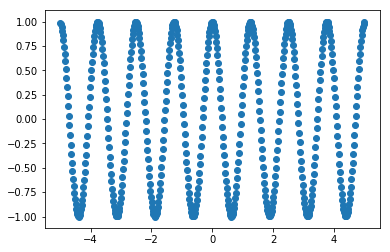

In [178]:
np.random.seed(12345)

n = 500
x_data = np.linspace(-5, 5, num= n)
#y_data = 2.9 * np.cos(1.5 * x_data+ 3) + np.random.normal(size= n)
y_data = np.cos(5 * x_data) + 0.001*np.random.normal(size= n)
plt.scatter(x_data, y_data)

Fitting using scipy

In [255]:
from scipy import optimize

def test_func(x, b):
    return np.cos(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[4.3])

print(params)

[ 5.00002238]


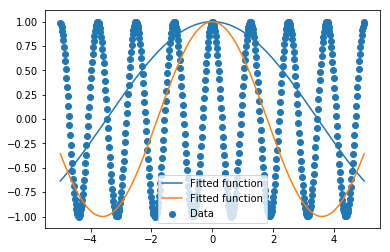

In [190]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0]), label='Fitted function')
plt.plot(x_data, test_func(x_data, 0.87), label='Fitted function')

plt.legend(loc='best')

Gradient descent

In [242]:
def deriv_error_funct(w, X, y):
    '''
    The derivative of the error functiion. We use as loss function the MSE
    '''
    w_deriv = 2 * np.mean((np.cos(w*X) - y) * (-np.sin(w*X)) * X)
    return w_deriv

def error_funct(w, X, y):
    return np.mean((np.cos(w*X) - y)**2)

In [215]:
def step(w_init, precision, l_r, X, y, niters= 20):
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_init - a starting value of x that will get updated based on the learning rate
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    
    w_list, err_list = [w_init], [error_funct(w_init, X, y)]

    i=0
    # keep looping until your desired precision
    while True:
        
        print (w_init)
        
        # get the derivation of the old value of x
        d_w = - deriv_error_funct(w_init, X, y)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        w_new = w_init + (l_r * d_w)
        
        # append the new value of x to a list of all x-s for later visualization of path
        w_list.append(w_new)
        
        # append the new value of y to a list of all y-s for later visualization of path
        err_list.append(error_funct(w_new, X, y))
        
        if abs(w_new - w_init) < precision:
            break
        
        # change the value of x
        w_init = w_new
        i+=1
        if (i== niters):
            break

    print ("Local minimum occurs at: "+ str(w_init))
    print ("Number of steps: " + str(len(w_list)))
    
    

In [253]:
step(5.8, 0.01 ,0.1, x_data, y_data,niters=100)

5.8
5.73597299925
5.6252216838
5.44669566875
5.22823667188
5.07157906667
5.01388294736
5.00227573208
Local minimum occurs at: 5.00227573208
Number of steps: 9


In [261]:
from scipy import fft
N =len(y_data)
yf = fft(y_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

NameError: name 'T' is not defined

Fitting using sklearn

In [22]:
from scipy import optimize
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Cosine(BaseEstimator, TransformerMixin):
    def __init__(self, amp=None, omega=1, phi=1):
        #Initialization of model parameters
        self.amplitudes= amp
        self.omega= omega 
        self.phi= phi
        self.model = LinearRegression()
        self.coefs= None 
        self.params_covariance= None
    
    @staticmethod
    def harmonic_funct(x, amp, omega, phi):
        return amp * np.cos(omega*x + phi)
        
    def _fit_params(self, X, y):
        self.amplitudes = (y.max() - y.min()) / 2.
        params, params_covariance = optimize.curve_fit(self.harmonic_funct, X, y,
                                                       p0=[self.amplitudes, self.omega, self.phi])
        #Update omega and phi with scipy parameters (optimization)
        self.amplitudes = params[0]
        self.omega = params[1]
        self.phi= params[2]
        self.params_covariance= params_covariance
    
    def _transform_params(self, X): 
        omega = self.omega * np.ones(len(X))
        phi = self.phi * np.ones(len(X))
        #a0= np.ones(len(X))
        x_new= np.cos(omega*X+ phi)
        x_new = x_new[:, np.newaxis]
        return x_new
    
    def fit(self, X, y):
        self._fit_params(X, y)
        X_transf= self._transform_params(X)
        self.model.fit(X_transf, y)
        self.coefs= self.model.coef_
        return self
    
    def predict(self, X):
        X_transf= self._transform_params(X)
        ypred= self.model.predict(X_transf)
        return ypred    

In [23]:
# random split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [24]:
#USING THE HARMONIC CLASS
c= Cosine()
c.fit(X_train, y_train)
y_pred = c.predict(X_test)


In [25]:
print(c.omega, c.phi)
#print(c.amplitudes)
print(c.coefs)

1.51647458001 1.94924950386
[-3.11180921]


In [ ]:
[-3.22480716  1.51146069  1.95323553]

In [28]:
#Get rmse 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('rmse:', rmse)
print('r2:',r2)

rmse: 1.1460085292
r2: 0.829729643451


In [33]:
# Aplication of the model to the whole dataset
x= c._transform_params(x_data)
y = c.model.predict(x)

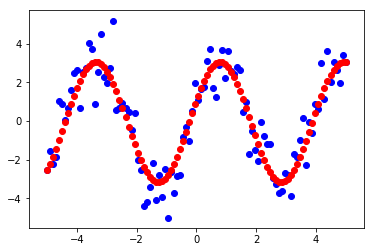

In [34]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label= 'observations', color= 'b')
ax.scatter(x_data, y, label= 'predictions', color= 'r')

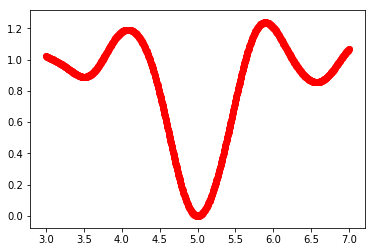

In [243]:
omegas = np.linspace(3, 7, 800)
errors = [error_funct(omega, x_data, y_data) for omega in omegas]
fig, ax = plt.subplots()
ax.scatter(omegas, errors, label= 'error', color= 'r')

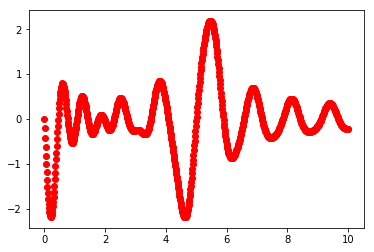

In [227]:
omegas = np.linspace(0, 10, 800)
d_errors = [deriv_error_funct(omega, x_data, y_data) for omega in omegas]
fig, ax = plt.subplots()
ax.scatter(omegas, d_errors, label= 'd_error', color= 'r')